In [1]:
push!(LOAD_PATH, pwd())
using CairoMakie
using CSV
using DataFrames
using SpectralGrid
using CubicBSpline
using Integrator

In [2]:
nodes = 100
grid = createGrid(GridParameters(xmin = -50.0,
        xmax = 50.0,
        num_nodes = nodes,
        rDim = nodes*3,
        b_rDim = nodes+3,
        BCL = Dict("u" => CubicBSpline.PERIODIC),
        BCR = Dict("u" => CubicBSpline.PERIODIC),
        vars = Dict("u" => 1)));

In [3]:
gridpoints = getGridpoints(grid)

300-element Vector{Float64}:
 -49.887298334620745
 -49.5
 -49.112701665379255
 -48.887298334620745
 -48.5
 -48.112701665379255
 -47.887298334620745
 -47.5
 -47.112701665379255
 -46.887298334620745
 -46.5
 -46.112701665379255
 -45.887298334620745
   ⋮
  46.112701665379255
  46.5
  46.887298334620745
  47.112701665379255
  47.5
  47.887298334620745
  48.112701665379255
  48.5
  48.887298334620745
  49.112701665379255
  49.5
  49.887298334620745

In [4]:
sigma = 20.0
for i = 1:grid.params.rDim
    x = gridpoints[i]
    u = exp(-(x / sigma)^2)
    grid.physical[i,1,1] = u
end

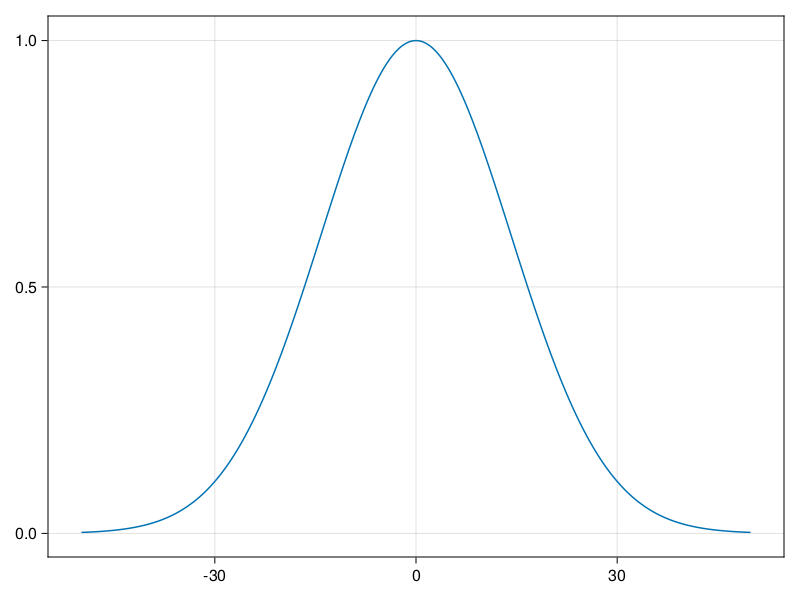

In [5]:
lines(gridpoints[:],grid.physical[:,1,1], label = "0 hr")

In [6]:
ics = DataFrame(r=gridpoints[:,1],
    u=grid.physical[:,1,1]) 
CSV.write("1d_linear_advection_test_ics.csv",ics)

"1d_linear_advection_test_ics.csv"

In [7]:
integrate_LinearAdvection1D()

NumericalModels.ModelParameters(0.05, 100.0, 100.0, "LinearAdvection1D", "1d_linear_advection_test_ics.csv", "./output/", GridParameters
  xmin: Float64 -50.0
  xmax: Float64 50.0
  num_nodes: Int64 100
  rDim: Int64 300
  b_rDim: Int64 103
  l_q: Float64 2.0
  BCL: Dict{String, Dict{String, Int64}}
  BCR: Dict{String, Dict{String, Int64}}
  lDim: Int64 0
  b_lDim: Int64 0
  zmin: Float64 0.0
  zmax: Float64 0.0
  zDim: Int64 0
  b_zDim: Int64 0
  BCB: Dict{String, Int64}
  BCT: Dict{String, Int64}
  vars: Dict{String, Int64}
, Dict(:c_0 => 1.0, :K => 0.0))
GridParameters
  xmin: Float64 -50.0
  xmax: Float64 50.0
  num_nodes: Int64 100
  rDim: Int64 300
  b_rDim: Int64 103
  l_q: Float64 2.0
  BCL: Dict{String, Dict{String, Int64}}
  BCR: Dict{String, Dict{String, Int64}}
  lDim: Int64 0
  b_lDim: Int64 0
  zmin: Float64 0.0
  zmax: Float64 0.0
  zDim: Int64 0
  b_zDim: Int64 0
  BCB: Dict{String, Int64}
  BCT: Dict{String, Int64}
  vars: Dict{String, Int64}

Writing output to ./outpu

In [8]:
initial = CSV.read("output/physical_out_0.0.csv", DataFrame, header=1)
final = CSV.read("output/physical_out_100.0.csv", DataFrame, header=1)
radius = initial.r
u0 = initial.u
u500 = final.u

300-element Vector{Float64}:
 0.003036169446397849
 0.0030749530819412195
 0.0031624975814790743
 0.0032357549214079183
 0.0033995532325012292
 0.003610574743088254
 0.003754792130449894
 0.004038823740701745
 0.004367997385603245
 0.004580052479812578
 0.004979327012386446
 0.005422691531717447
 0.005701007926649594
 ⋮
 0.005418161005624569
 0.004976019286268545
 0.0045777540119411935
 0.004366188693279781
 0.004037696853919128
 0.0037541636753092144
 0.0036101606253087157
 0.0033993947981020025
 0.003235735344866582
 0.003162516825080747
 0.003074987336316825
 0.0030361794979487525

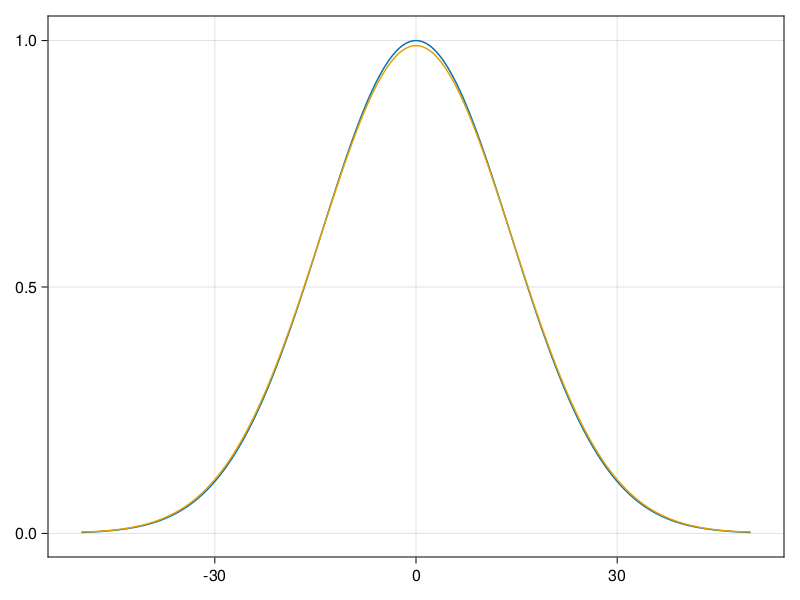

In [9]:
lines(initial.r,initial.u, label = "0 hr")
lines!(final.r,final.u, label = "500 secs")
current_figure()

In [10]:
l2_norm = sqrt(sum((initial.u .- final.u).^2))

0.07716439324116552